<a href="https://colab.research.google.com/github/Sottim/AIDA-Spring2023/blob/main/Week8_PrincipalComponentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all the necessay modules
#Pandas is for panel data
import pandas as pd
#Numpy for numerical python
import numpy as np
#This is for plotting
import seaborn as sns
#Matlab Plaot library; Python plot
import matplotlib.pyplot as plt


In [ ]:
df_1 = pd.read_csv("Ashoka longley.csv")
#Display the first five elements
df_1.head() 

,Obs,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,60323,83.0,234289,2356,1590,107608,1947
1,2,61122,88.5,259426,2325,1456,108632,1948
2,3,60171,88.2,258054,3682,1616,109773,1949
3,4,61187,89.5,284599,3351,1650,110929,1950
4,5,63221,96.2,328975,2099,3099,112075,1951


In [ ]:
#Because Y variable is Total Employment
df = df_1.drop('TOTEMP', axis=1) 
df.head()

,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,83.0,234289,2356,1590,107608,1947
1,2,88.5,259426,2325,1456,108632,1948
2,3,88.2,258054,3682,1616,109773,1949
3,4,89.5,284599,3351,1650,110929,1950
4,5,96.2,328975,2099,3099,112075,1951


In [ ]:
#Not needed for regression
df2 = df.drop('YEAR', axis=1) 
df2.head()

,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP
0,1,83.0,234289,2356,1590,107608
1,2,88.5,259426,2325,1456,108632
2,3,88.2,258054,3682,1616,109773
3,4,89.5,284599,3351,1650,110929
4,5,96.2,328975,2099,3099,112075


In [ ]:
#Not needed for regression
df3 = df2.drop('Obs', axis=1) 
df3.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


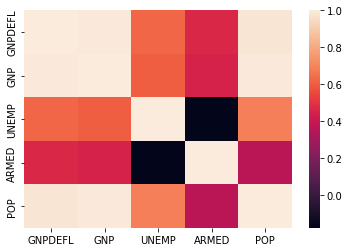

In [ ]:
#Check the heatmap for correlation
sns.heatmap(df3.corr())
plt.show()
# Black correlation = No correlation


In [ ]:
X = df3
X.head()


,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


In [ ]:
Y = df_1['TOTEMP']
Y.head()


0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

In [ ]:
import statsmodels.api as sm
#This adds the constant term beta0 to
#y = b0 + b1.X1 + b2.X2 ....
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() #Ordinary least square
model.summary()

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.70e-09
Time:                        07:39:47   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.246e+04   3.52e+04      2.629      0.025    1.41e+04    1.71e+05
GNPDEFL      -48.4628    132.248     -0.366      0.722    -343.129     246.204
GNP            0.0720      0.032      2.269      0.047       0.001       0.143
UNEMP         -0.4039      0.439     -0.921      0.379      -1.381       0.573
ARMED         -0.5605      0.284     -1.975      0.077      -1.193       0.072
POP           -0.4035      0.330     -1.222      0.250      -1.139       0.332
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                     1.21e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.multivariate.pca import PCA
pc = PCA(df3, #It should only have X's
         ncomp=5, #number of Principle Components
         standardize=True #because the data has differnet units Rs/number etc. z = x-u/sigma
         )

In [ ]:
df_comp = pc.loadings.T #pc.loadings are the eigen vectors that we computed
#We are transposing it so that we can see it nicely
df_comp

,GNPDEFL,GNP,UNEMP,ARMED,POP
comp_0,0.521013,0.519909,0.365806,0.229642,0.521240
comp_1,-0.058090,-0.053455,0.595323,-0.798315,0.045299
comp_2,0.188915,0.317497,-0.710076,-0.551157,0.235635
comp_3,0.776958,-0.135947,0.004615,-0.078584,-0.609637
comp_4,0.292947,-0.779456,-0.086871,-0.002874,0.546878


In [ ]:
#PCA Scores
X_scores = pc.factors #pc factors are PCA scores
X_scores

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.421723,0.179096,0.168870,-0.347564,0.052155
1,-0.364998,0.202319,0.366133,0.259528,0.354179
2,-0.276955,0.366830,-0.286991,-0.017918,0.065753
3,-0.253868,0.304045,-0.072166,-0.122680,-0.363744
4,-0.168318,-0.294286,-0.013361,0.197849,-0.076236
5,-0.117556,-0.457752,-0.090784,0.093485,0.071457
6,-0.085413,-0.454998,0.036854,-0.150349,0.319023
7,0.013020,-0.141273,-0.595811,-0.135131,0.113731
8,0.007821,-0.165155,-0.062547,-0.203438,-0.563952
9,0.046341,-0.130467,0.161966,0.046931,-0.260657


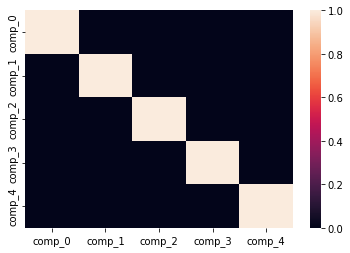

In [ ]:
sns.heatmap(X_scores.corr())
plt.show() #There is no correlation because the PCs are orthogonal to each other and multi-collinearity disappears

In [ ]:
#First run the PCA and then do the following lines of code
#This adds the constant term beat0 to the Myltiple Linear Regression.
X_pca = sm.add_constant(X_scores)
model = sm.OLS(Y,X_pca).fit()
model.summary()


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.70e-09
Time:                        07:39:47   Log-Likelihood:                -117.83
No. Observations:                  16   AIC:                             247.7
Df Residuals:                      10   BIC:                             252.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.532e+04    120.811    540.656      0.000     6.5e+04    6.56e+04
comp_0      1.293e+04    483.243     26.765      0.000    1.19e+04     1.4e+04
comp_1     -1648.5478    483.243     -3.411      0.007   -2725.280    -571.815
comp_2      3448.2146    483.243      7.136      0.000    2371.482    4524.947
comp_3       170.4600    483.243      0.353      0.732    -906.272    1247.192
comp_4      -864.9544    483.243     -1.790      0.104   -1941.687     211.778
==============================================================================
Omnibus:                        1.572   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                0.642
Skew:                           0.489   Prob(JB):                        0.725
Kurtosis:                       3.079   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""